<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Prevendo_Ocorr%C3%AAncia_Crimes_Volting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Black'> Prevendo Crimes com Ciência de Dados</font>


![](https://i.gifer.com/QxHJ.gif)

A criminalidade no Brasil é um problema persistente que atinge direta ou indiretamente a população. O país tem níveis acima da média mundial no que se refere a crimes violentos, com níveis particularmente altos no tocante a violência armada e homicídios. Pesquisas indicam que aproximadamente 1 em cada 3 brasileiros já teve um parente ou amigo que foi assassinado.

Neste Projeto Completo, vamos demonstrar a aplicação da **Ciência de Dados** para executar tarefas de **classificação de Crimes** para ajudar a polícia na previsão e prevenção de crimes. Vamos Construir uma Máquina Preditiva com um Modelo **Ensemble Voting**, que é um modelo composto de vários outros modelos, cada qual fazendo suas próprias previsões. Ao final, ocorre uma votação para então definir a previsão final do modelo ensemble.



**Fonte de Dados**

O dataset usado é público, contém crimes desde 2001 até hoje, e pode ser encontrado nesse link: 

https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie



![](https://media1.tenor.com/images/eed374352396281dc7f9e9d59541733e/tenor.gif?itemid=18384199)






#1° Problema de Negócio

![](https://i.kym-cdn.com/photos/images/original/000/997/528/344.gif)


Aplicar a **Ciência de Dados** para Previsão dos tipos de Crime para ajudar a polícia na prevenção de delitos.


#2° Análise Exploratória dos Dados

![](https://i.pinimg.com/originals/ba/4a/44/ba4a4442b22b85ce6afef9e676825bed.gif)


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [ ]:
!pip install -q yellowbrick

In [ ]:
# Imports
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Métricas de avaliação
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
import sklearn

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

Author: Ciência dos Dados

seaborn   : 0.11.1
sys       : 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas    : 1.1.5
matplotlib: 3.2.2
IPython   : 5.5.0
sklearn   : 0.0



### Carregando os Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/3. Conteúdos/Dados/Crimes_-_2001_to_Present.csv', error_bad_lines=False)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351061 entries, 0 to 7351060
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
df['Location Description'].value_counts()
#sns.countplot(df['Primary Type'], orient= "v")

#3° Pré-Processamento dos Dados

![](https://media4.giphy.com/media/xThtannNRQjw5U1ZE4/giphy.gif?cid=6c09b952b016f27a035a490ead33f6b1d7c7ae7f11a182a9&rid=giphy.gif&ct=g)

### Data Wrangling

In [ ]:
# Removendo valores missing
df = df.dropna()

In [ ]:
# Como o conjunto de dados é muito grande vamos trabalhar com uma amostra para modelagem como prova de conceito
df = df.sample(n=10000)

In [ ]:
# Removendo atributos irrelevantes / sem significado

df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

In [ ]:
df

In [ ]:
# Dividindo a coluna Date em Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

In [ ]:
# Convertendo atributos categóricos em numéricos
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [ ]:
df.info()

In [ ]:
# Variável target
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


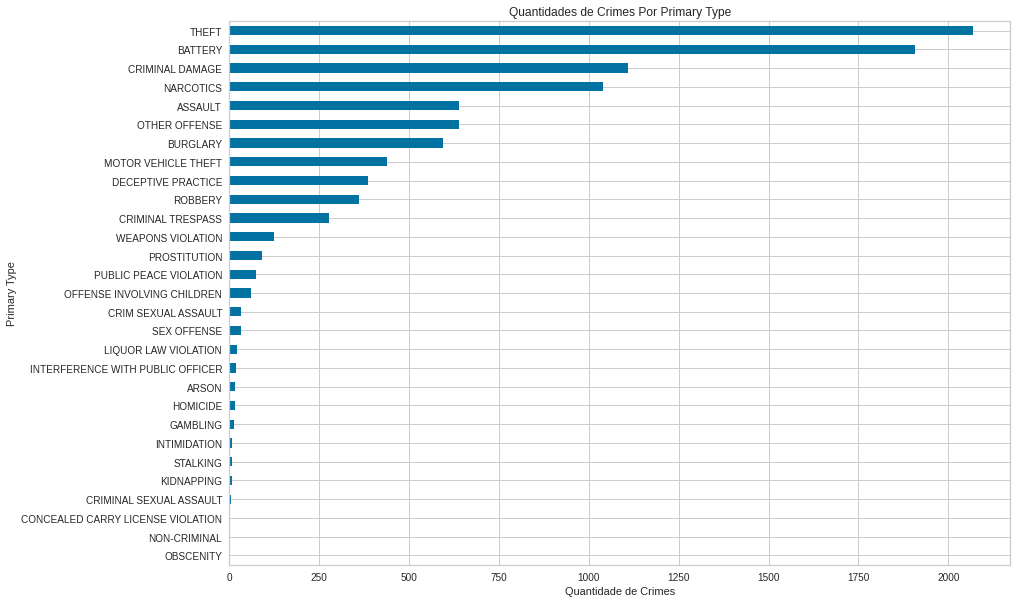

In [ ]:
# Plot
plt.figure(figsize=(14,10))
plt.title('Quantidades de Crimes Por Primary Type')
plt.ylabel('Tipo de Crime')
plt.xlabel('Quantidade de Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# No plot anterior, pudemos ver que as classes estão bastante desequilibradas
# Portanto, vamos agrupar vários tipos de crimes com menos ocorrências em 'Outros' para reduzir o valor da Classe Alvo

# Primeiro, resumimos a quantidade de Crime Type ocorrida e selecionamos as últimas 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
8,8,639
4,4,639
0,0,595
7,7,438
12,12,387
1,1,360
13,13,278
10,10,153
14,14,124
15,15,92


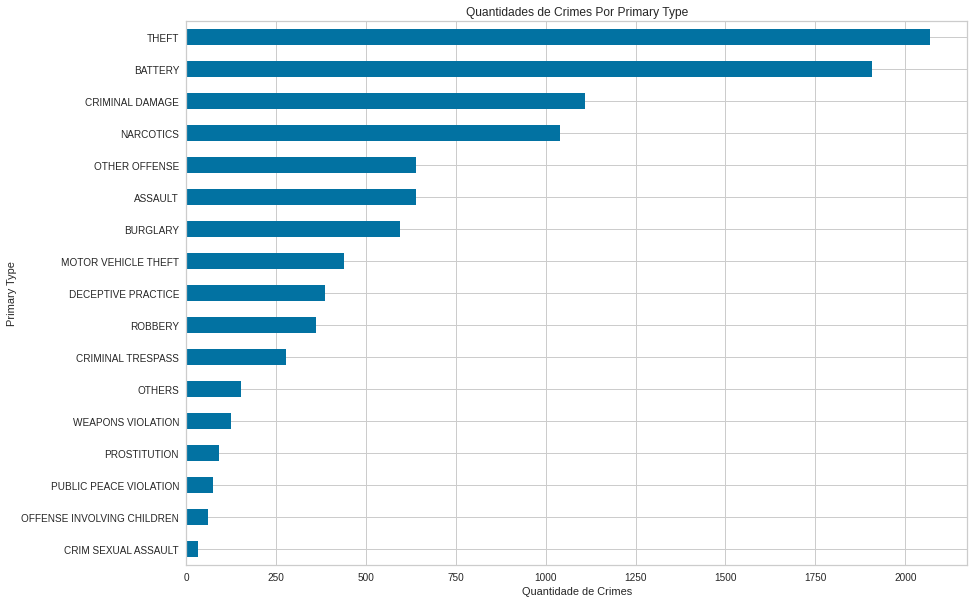

In [ ]:
# Depois disso, substituímos pelo rótulo 'OUTROS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'
 
# Plot Bar 
plt.figure(figsize=(14,10))
plt.title('Quantidades de Crimes Por Primary Type')
plt.ylabel('Tipo de Crime')
plt.xlabel('Quantidade de Crimes')
 
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
 
plt.show()

In [ ]:
# Agora ficamos com 14 Class 
Classes = df['Primary Type'].unique()
Classes

array(['BURGLARY', 'ROBBERY', 'CRIMINAL DAMAGE', 'THEFT', 'OTHER OFFENSE',
       'NARCOTICS', 'BATTERY', 'MOTOR VEHICLE THEFT', 'ASSAULT',
       'PUBLIC PEACE VIOLATION', 'OTHERS', 'OFFENSE INVOLVING CHILDREN',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'PROSTITUTION', 'CRIM SEXUAL ASSAULT'], dtype=object)

In [ ]:
# Encoding dos rótulos de destino em variáveis categóricas:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

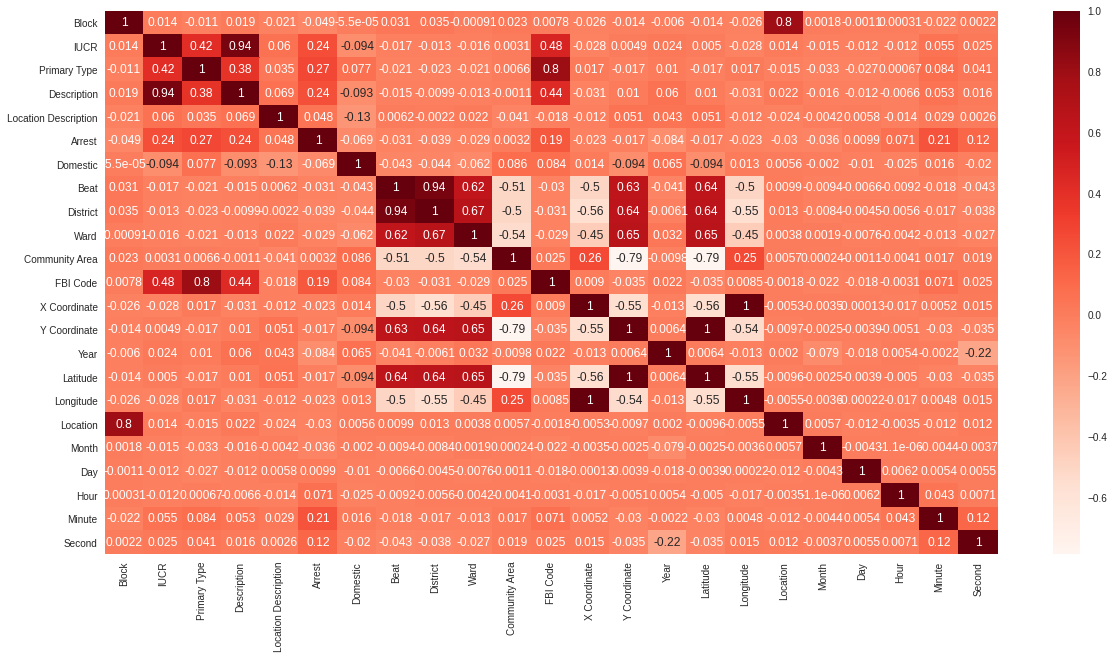

In [ ]:
# Seleção de recursos usando o método de filtro
# Dividir Dataframe para direcionar classe e recursos
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

# Usando Correlação Pearson 
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

O coeficiente de correlação possui valores entre -1 e 1

* Um valor mais próximo de 0 implica correlação mais fraca (0 exato não implica correlação)
* Um valor próximo de 1 implica correlação positiva mais forte
* Um valor mais próximo de -1 implica correlação negativa mais forte

In [ ]:
# Correlação com a variável de saída
cor_target = abs(cor['Primary Type'])

# Selecionando recursos altamente correlacionados
relevant_features = cor_target[cor_target > 0.3]
relevant_features

IUCR            0.418669
Primary Type    1.000000
Description     0.381950
FBI Code        0.799646
Name: Primary Type, dtype: float64

In [ ]:
# No ponto atual, os atributos são selecionados manualmente com base na seleção de recursos. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [ ]:
# Dividindo o conjunto de dados em Conjunto de treinamento e Conjunto de teste
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)
 
x1 = x[Features]    
x2 = x[Target]      
y1 = y[Features]    
y2 = y[Target]      
 
print('Conjunto de Atributos Usados    : ', Features)
print('Variável Target        : ', Target)
print('Shape do Dataset de Treino   : ', x.shape)
print('Shape do Dataset de Teste       : ', y.shape)

Conjunto de Atributos Usados    :  ['IUCR', 'Description', 'FBI Code']
Variável Target        :  Primary Type
Shape do Dataset de Treino   :  (8000, 23)
Shape do Dataset de Teste       :  (2000, 23)


#4° Construíndo a Máquina Preditiva 

![](https://i.pinimg.com/originals/7f/45/33/7f453322c54c5f0975e553dfffab2634.gif)


**Construção da Máquina Preditiva**

### SVM - Suport Vector Machines

In [ ]:
# SVM
SVM_model = SVC()

# Model Training
SVM_model.fit(X=x1, y=x2)

# Prediction
result = SVM_model.predict(y[Features]) 

In [ ]:
# Avaliação do Modelo
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("\n========== Métricas do Modelo SVM ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix:\n ")
print(confusion_m)


========== Métricas do Modelo SVM ==========
Accuracy    :  0.6385
Recall      :  0.6385
Precision   :  0.6292051559608796
F1 Score    :  0.6385
Confusion Matrix:
 
[[109   0   0   3   0   6   0   0   0   0   0   0   0   0   0   0   0]
 [  5  62   0  10   1   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0   6  99 107   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   8  42 369   0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  38  11  71  10   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0  21  15 161   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5   3   3 351   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0  17  67   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   6  99   0  25   0   0   0  10   0   0   0   0]
 [  0   0   0   0   1   1   0   0   0   0   0   0   9   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0  24   0   6   0   0   0   0]
 [  0   0   0   0   1   2   8   0   0   0   3   0   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Relatório de Classificação =================

                            precision    recall  f1-score   support

                  BURGLARY       0.96      0.92      0.94       118
                   ROBBERY       0.82      0.77      0.79        81
           CRIMINAL DAMAGE       0.70      0.46      0.55       216
                     THEFT       0.67      0.87      0.76       422
             OTHER OFFENSE       0.30      0.08      0.13       132
                 NARCOTICS       0.48      0.81      0.61       198
                   BATTERY       0.65      0.96      0.77       365
       MOTOR VEHICLE THEFT       0.00      0.00      0.00        85
                   ASSAULT       1.00      0.18      0.30       140
    PUBLIC PEACE VIOLATION       0.00      0.00      0.00        11
                    OTHERS       0.56      0.69      0.62        35
OFFENSE INVOLVING CHILDREN       0.00      0.00      0.00        14
        DECEPTIVE PRACTICE       0.48      0.82    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


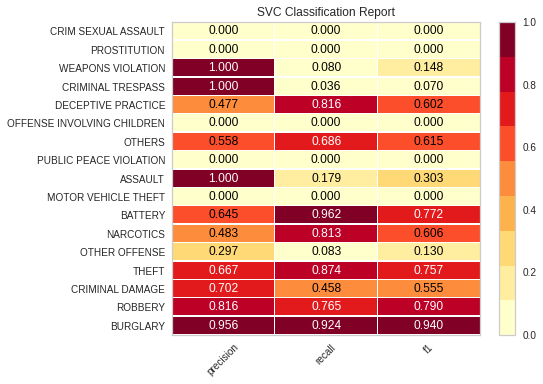

In [ ]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(SVM_model, classes=target_names)
visualizer.fit(X=x1, y=x2)    
visualizer.score(y1, y2)       

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             

### Neural Network - Redes Neurais Profundas


In [ ]:
# Rede Neural
nn_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40,), random_state=1, max_iter=1000)

# Model Training
nn_model.fit(X=x1, y=x2)

# Prediction
result = nn_model.predict(y[Features]) 

In [ ]:
# Avaliação do Modelo
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

========== Neural Network ==========
Accuracy    :  0.867
Recall      :  0.867
Precision   :  0.8398961651694581
F1 Score    :  0.867
Confusion Matrix: 

[[118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 216   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 422   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  76  23   0   2   0   0   2   0   0  29   0   0   0]
 [  0   0   0   0  14 184   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8 354   2   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0  12  72   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   4   0 121   0   0   0  15   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   8   0   0   1   0   0   0   0]
 [  0   0   0   0   0   4   0   0   1   2  22   0   4   0   0   0   2]
 [  0   0   0   0   0   3   7   0   0   0   2   0   2   0   0   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

### Decision Tree

In [ ]:
# Decision Tree
Dt_model = DecisionTreeClassifier(max_features=3, max_depth=5)

# Model Training
Dt_model.fit(X=x1, y=x2)

# Prediction
result = Dt_model.predict(y[Features]) 

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Decision Tree ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

In [ ]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(Dt_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     
visualizer.score(y1, y2)       

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()            

#5° Avaliação da Máquina Preditiva

![](https://media2.giphy.com/media/3o6ZsZzsJQx0jmmU5q/200.gif)

In [ ]:
# Ensemble Voting Model
# Combinando 3 modelos para criar um modelo Ensemble

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('SVM', SVM_model), 
                                     ('Dt', Dt_model), 
                                     ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)

eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y[Features])

In [ ]:
# Avaliação do Modelo
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

============= Ensemble Voting =============
Accuracy    :  0.8605
Recall      :  0.8605
Precision   :  0.8233787987129935
F1 Score    :  0.8605
Confusion Matrix: 

[[118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 216   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 422   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  11  87   1   2   0   0   0   2   0   0  29   0   0   0]
 [  0   0   0   6   8 184   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5   2   3 351   0   0   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0  17  67   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   3   0 121   0   0   0  16   0   0   0   0]
 [  0   0   0   0   1   1   0   0   0   0   0   0   9   0   0   0   0]
 [  0   0   0   0   0   5   0   0   1   0  19   0  10   0   0   0   0]
 [  0   0   0   0   1   2   7   0   0   0   2   0   2  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Relatório de Classificação =================

                            precision    recall  f1-score   support

                  BURGLARY       1.00      1.00      1.00       118
                   ROBBERY       1.00      1.00      1.00        81
           CRIMINAL DAMAGE       1.00      1.00      1.00       216
                     THEFT       0.95      1.00      0.97       422
             OTHER OFFENSE       0.88      0.66      0.75       132
                 NARCOTICS       0.86      0.93      0.90       198
                   BATTERY       0.80      0.96      0.87       365
       MOTOR VEHICLE THEFT       0.00      0.00      0.00        85
                   ASSAULT       0.98      0.86      0.92       140
    PUBLIC PEACE VIOLATION       0.00      0.00      0.00        11
                    OTHERS       0.61      0.54      0.58        35
OFFENSE INVOLVING CHILDREN       0.00      0.00      0.00        14
        DECEPTIVE PRACTICE       0.44      0.86    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


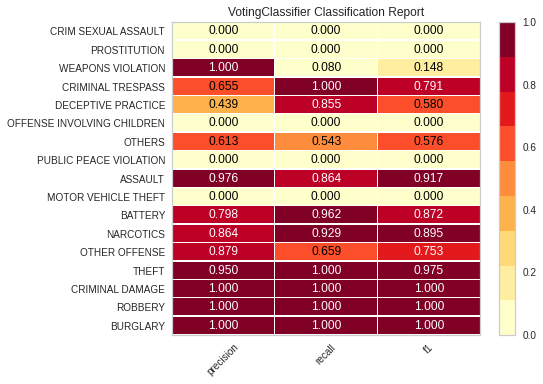

In [ ]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     
visualizer.score(y1, y2)      
 
print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))
 
g = visualizer.poof()